In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [34]:
x,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class=1,hypercube=False,class_sep=10,random_state=41)

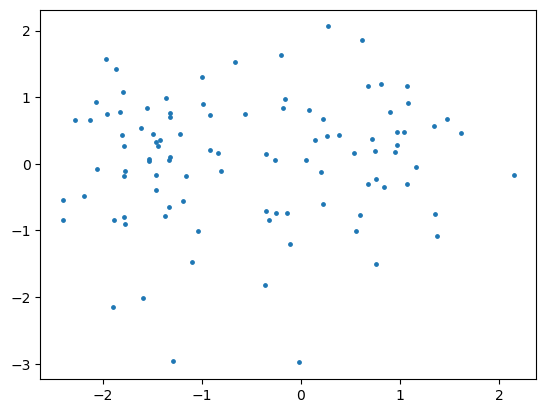

In [35]:
plt.scatter(x[:,0],x[:,1],s=6)

In [36]:
x.shape

(100, 2)

In [37]:
y.shape

(100,)

In [38]:
def sigmod(z):
    return 1/(1+np.exp(-z))

In [51]:
def logistic_regression_sigmod(x,y):
    x=np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    learning_rate = 0.1
    for i in range(x.shape[0]):
        x_i = np.random.randint(0,x.shape[0])
        y_hat = sigmod(np.dot(x[x_i],weights))
        weights = weights + learning_rate*(y[x_i]-y_hat)*x[x_i]
    return weights[0],weights[1:]

In [49]:
def step(z):
    return 1 if z>0 else 0

In [41]:
def logistic_regression_preceptron(x,y):
    x=np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    learning_rate = 0.1
    for i in range(1000):
        x_i = np.random.randint(0,x.shape[0])
        y_hat = step(np.dot(x[x_i],weights))
        weights = weights + learning_rate*(y[x_i]-y_hat)*x[x_i]
    return weights[0],weights[1:]

In [42]:
intercept_sigmod,coef_sigmod = logistic_regression_sigmod(x,y)

In [43]:
intercept_preceptron,ceof_preceptron = logistic_regression_preceptron(x,y)

In [44]:
m_sigmod,b_sigmod = -coef_sigmod[0]/coef_sigmod[1],intercept_sigmod/coef_sigmod[1]
m_preceptron,b_perceptron = -ceof_preceptron[0]/ceof_preceptron[1],intercept_preceptron/ceof_preceptron[1]

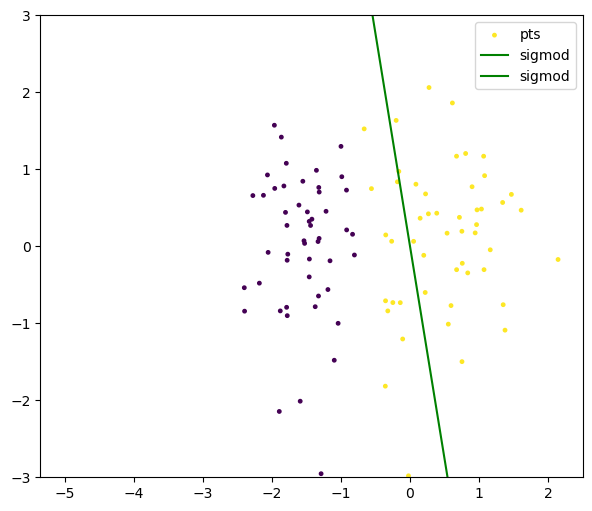

In [47]:
plt.figure(figsize=(7,6))
x_test = np.linspace(-5,2,100)
plt.scatter(x[:,0],x[:,1],s=6,label='pts',c=y)
# plt.plot(x_test,m_preceptron*x_test+b_perceptron,label='perceptron',c='red')
plt.plot(x_test,m_sigmod*x_test,b_sigmod,label='sigmod',c='green')
plt.ylim(-3,3)
plt.legend()